In [2]:
import numpy as np
import pandas as pd

# Load datasets
train_data = pd.read_csv('../data/train_data.csv')
test_data = pd.read_csv('../data/test_data.csv')

/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Select features and target variable:
features = ['sqft_log', 'beds_std', 'full_baths_std', 'total_rooms_std', 'zip_code']
target = 'sold_price_log'

X_train = train_data[features]
y_train = train_data[target].values
X_test = test_data[features]
y_test = test_data[target].values


In [4]:
# Implement linear regression model from scratch:
class LinearRegressionFromScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias



In [5]:
# Normalize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# Train the Linear Regression model:
model = LinearRegressionFromScratch(learning_rate=0.01, iterations=1000)
model.fit(X_train, y_train)


In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions
predictions = model.predict(X_test)

# Calculate MSE for RMSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)

# Calculate R-squared
r2 = 1 - (np.sum((y_test - predictions) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


Root Mean Squared Error (RMSE): 0.4459647332955719
Mean Absolute Error (MAE): 0.35078503202029676
R-squared (R²): 0.3259547599389001


In [15]:
# Regularization techniques (Lasso Regression) to prevent overfitting:
class LassoRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, alpha=0.01):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.alpha = alpha

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + (self.alpha / n_samples) * np.sign(self.weights)
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


# Train the Lasso Regression model:
lasso_model = LassoRegression(learning_rate=0.01, iterations=1000, alpha=0.01)
lasso_model.fit(X_train, y_train)

# Make predictions
lasso_predictions = lasso_model.predict(X_test)

# Calculate MSE for RMSE
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)

# Calculate MAE
lasso_mae = mean_absolute_error(y_test, lasso_predictions)

# Calculate R-squared
lasso_r2 = 1 - (np.sum((y_test - lasso_predictions) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print(f'Lasso Regression Root Mean Squared Error (RMSE): {lasso_rmse}')
print(f'Lasso Regression Mean Absolute Error (MAE): {lasso_mae}')
print(f'Lasso Regression R-squared (R²): {lasso_r2}')


Lasso Regression Root Mean Squared Error (RMSE): 0.44596476883039987
Lasso Regression Mean Absolute Error (MAE): 0.35078493925898907
Lasso Regression R-squared (R²): 0.3259546525219642


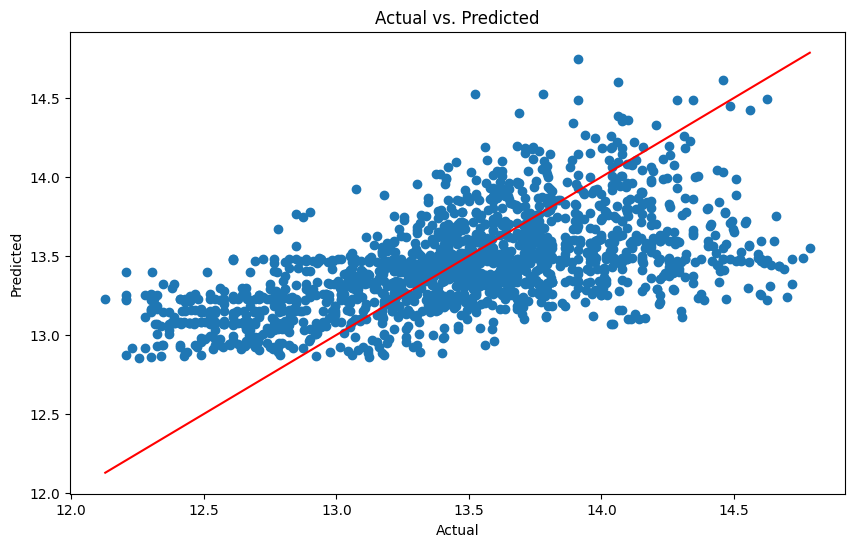

In [12]:
# see the predicted results of the model, using plot:
import matplotlib.pyplot as plt

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()